### Importing necessary ml modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Generating dummy data (We couldn't find authentic data)

In [2]:
from scipy.stats import beta

def generate_authentic_flood_dataset(num_records=1500):
    """
    Generate a more authentic flood occurrence dataset 
    reflecting Nepal's actual flood characteristics
    """
    
    # Nepal's river basins
    basins = [
        'Koshi', 'Gandaki', 'Narayani', 'Karnali', 
        'Mahakali', 'Rapti', 'Bagmati', 'Kamala'
    ]
    
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Actual flood occurrence probabilities by basin
    # Based on historical flood frequency data
    basin_flood_probabilities = {
        'Koshi': 0.35,       # Highly flood-prone
        'Gandaki': 0.25,     # Moderate flood risk
        'Narayani': 0.40,    # High flood frequency
        'Karnali': 0.20,     # Lower flood risk
        'Mahakali': 0.15,    # Least flood-prone
        'Rapti': 0.30,       # Moderate flood risk
        'Bagmati': 0.35,     # Significant flood risk
        'Kamala': 0.45       # Very high flood risk
    }
    
    # Generate basin names with flood probabilities
    basin_names = []
    flood_probabilities = []
    for _ in range(num_records):
        basin = np.random.choice(list(basin_flood_probabilities.keys()))
        basin_names.append(basin)
        flood_probabilities.append(basin_flood_probabilities[basin])
    
    # Create base dataset
    data = {
        'basin_name': basin_names,
    }
    
    # Generate other feature columns
    data['total_slope'] = np.round(np.random.uniform(0, 45, num_records), 2)
    data['total_elevation'] = np.round(np.random.uniform(70, 8848, num_records), 2)
    data['annual_rainfall_mm'] = np.round(np.random.uniform(500, 5000, num_records), 2)
    
    # Authentic Flood Occurrence Generation
    def generate_authentic_flood_occurrence(base_probability):
        """
        Generate more nuanced flood occurrence 
        using beta distribution for realistic variation
        """
        # Adjust beta distribution parameters for more realistic flood occurrence
        a = base_probability * 20  # Shape parameter 1
        b = (1 - base_probability) * 20  # Shape parameter 2
        
        # Generate flood occurrence with beta distribution
        return 1 if np.random.beta(a, b) > 0.5 else 0
    
    # Generate flood occurrence column
    data['flood_occurred'] = [
        generate_authentic_flood_occurrence(prob) 
        for prob in flood_probabilities
    ]
    
    # Additional contextual features
    data['flood_month'] = np.random.choice([6,7,8,9], num_records)  # Monsoon months
    data['river_basin_width_km'] = np.round(np.random.uniform(10, 500, num_records), 2)
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    return df

# Generate dataset
authentic_flood_dataset = generate_authentic_flood_dataset(1500)

# Save to CSV
authentic_flood_dataset.to_csv('authentic_nepal_flood_dataset.csv', index=False)

# Detailed Analysis
print("Dataset Overview:")
print(authentic_flood_dataset.info())

print("\nFlood Occurrence by Basin:")
basin_flood_summary = authentic_flood_dataset.groupby('basin_name')['flood_occurred'].agg(['count', 'sum', 'mean'])
basin_flood_summary.columns = ['Total Records', 'Flood Occurrences', 'Flood Probability']
print(basin_flood_summary)

print("\nOverall Flood Occurrence:")
total_records = len(authentic_flood_dataset)
total_floods = authentic_flood_dataset['flood_occurred'].sum()
print(f"Total Records: {total_records}")
print(f"Total Flood Occurrences: {total_floods}")
print(f"Flood Occurrence Rate: {total_floods/total_records*100:.2f}%")

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   basin_name            1500 non-null   object 
 1   total_slope           1500 non-null   float64
 2   total_elevation       1500 non-null   float64
 3   annual_rainfall_mm    1500 non-null   float64
 4   flood_occurred        1500 non-null   int64  
 5   flood_month           1500 non-null   int32  
 6   river_basin_width_km  1500 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 76.3+ KB
None

Flood Occurrence by Basin:
            Total Records  Flood Occurrences  Flood Probability
basin_name                                                     
Bagmati               183                 16           0.087432
Gandaki               180                  2           0.011111
Kamala                188                 61           

In [3]:
authentic_flood_dataset.head() # to see the top 5 rows of the dataset

,basin_name,total_slope,total_elevation,annual_rainfall_mm,flood_occurred,flood_month,river_basin_width_km
0,Bagmati,5.26,893.88,4530.03,0,8,80.88
1,Karnali,42.29,8054.70,4591.29,0,8,309.50
2,Mahakali,28.25,5944.24,1912.45,0,8,467.30
3,Bagmati,15.07,7349.48,3609.75,0,6,105.89
4,Narayani,6.27,7785.68,1722.35,1,8,384.64


In [4]:
authentic_flood_dataset

,basin_name,total_slope,total_elevation,annual_rainfall_mm,flood_occurred,flood_month,river_basin_width_km
0,Bagmati,5.26,893.88,4530.03,0,8,80.88
1,Karnali,42.29,8054.70,4591.29,0,8,309.50
2,Mahakali,28.25,5944.24,1912.45,0,8,467.30
3,Bagmati,15.07,7349.48,3609.75,0,6,105.89
4,Narayani,6.27,7785.68,1722.35,1,8,384.64
...,...,...,...,...,...,...,...
1495,Mahakali,23.47,1934.86,3119.32,0,7,33.93
1496,Kamala,2.86,5894.41,4090.12,0,7,440.19
1497,Kamala,37.41,3679.49,4389.65,0,9,49.12
1498,Narayani,26.95,3602.32,2556.00,0,8,82.69


### Checking the percentage of true values for flood_occurred


In [5]:
# Calculate the percentage of 0s in the specified column
total_values = len(authentic_flood_dataset['flood_occurred'])
zero_count = (authentic_flood_dataset['flood_occurred'] == 1).sum()
zero_percentage = (zero_count / total_values) * 100

# Display the result
print(f"Percentage of 1s in column 'flood_occurred': {zero_percentage:.2f}%")


Percentage of 1s in column 'flood_occurred': 9.47%


In [6]:
authentic_flood_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   basin_name            1500 non-null   object 
 1   total_slope           1500 non-null   float64
 2   total_elevation       1500 non-null   float64
 3   annual_rainfall_mm    1500 non-null   float64
 4   flood_occurred        1500 non-null   int64  
 5   flood_month           1500 non-null   int32  
 6   river_basin_width_km  1500 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 76.3+ KB


In [7]:
authentic_flood_dataset.describe()

,total_slope,total_elevation,annual_rainfall_mm,flood_occurred,flood_month,river_basin_width_km
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,22.629573,4419.834373,2719.313267,0.094667,7.458667,251.627673
std,13.113228,2527.907327,1287.193694,0.292852,1.115850,144.339266
min,0.140000,70.100000,500.140000,0.000000,6.000000,10.650000
25%,10.820000,2271.407500,1616.655000,0.000000,6.000000,123.220000
50%,23.205000,4395.070000,2680.335000,0.000000,7.000000,247.555000
75%,34.035000,6592.575000,3820.697500,0.000000,8.000000,380.305000
max,44.970000,8844.120000,4989.870000,1.000000,9.000000,499.430000


### Checking for null values

In [8]:
authentic_flood_dataset.apply(lambda x:sum(x.isnull()), axis=0)

basin_name              0
total_slope             0
total_elevation         0
annual_rainfall_mm      0
flood_occurred          0
flood_month             0
river_basin_width_km    0
dtype: int64

### Data visualization

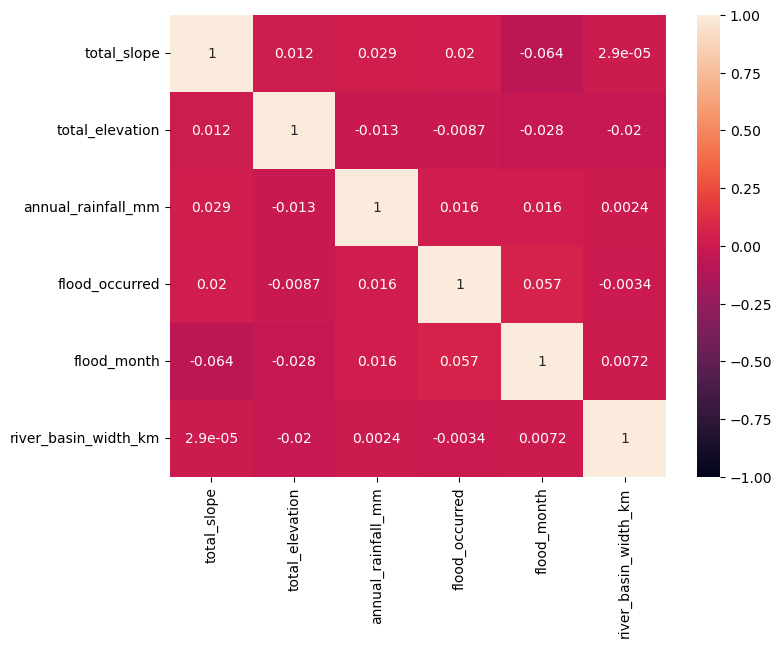

In [9]:
numeric_columns = [column for column in authentic_flood_dataset.columns if authentic_flood_dataset.dtypes[column] != 'object']
correlation = authentic_flood_dataset[numeric_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [10]:
numerical_cols=authentic_flood_dataset.select_dtypes(exclude=['category','object']).columns
category_cols=authentic_flood_dataset.select_dtypes(include=['category','object']).columns
category_cols 

Index(['basin_name'], dtype='object')

### Applying one hot encoding on non-numeric data

In [11]:
# Drop numerical columns from data
data_categorical = authentic_flood_dataset.drop(columns=numerical_cols)

# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(data_categorical, columns=['basin_name'])

encoded_data.head()

,basin_name_Bagmati,basin_name_Gandaki,basin_name_Kamala,basin_name_Karnali,basin_name_Koshi,basin_name_Mahakali,basin_name_Narayani,basin_name_Rapti
0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0


### Training and testing of the model

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib # For saving the model


# Extract numerical columns from the dataset
numerical_cols = authentic_flood_dataset.select_dtypes(include=['number'])

# Ensure X (features) and y (target) are aligned
X = numerical_cols
y = authentic_flood_dataset['flood_occurred']

# Verify the number of rows in X and y
print(f"Number of rows in X: {X.shape[0]}")
print(f"Number of rows in y: {len(y)}")

# Ensure consistent lengths before splitting
if X.shape[0] != len(y):
    raise ValueError("X and y have inconsistent numbers of rows!")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

Number of rows in X: 1500
Number of rows in y: 1500


DecisionTreeClassifier(random_state=42)

## Logistic Regression Model

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[275   0]
 [  0  25]]


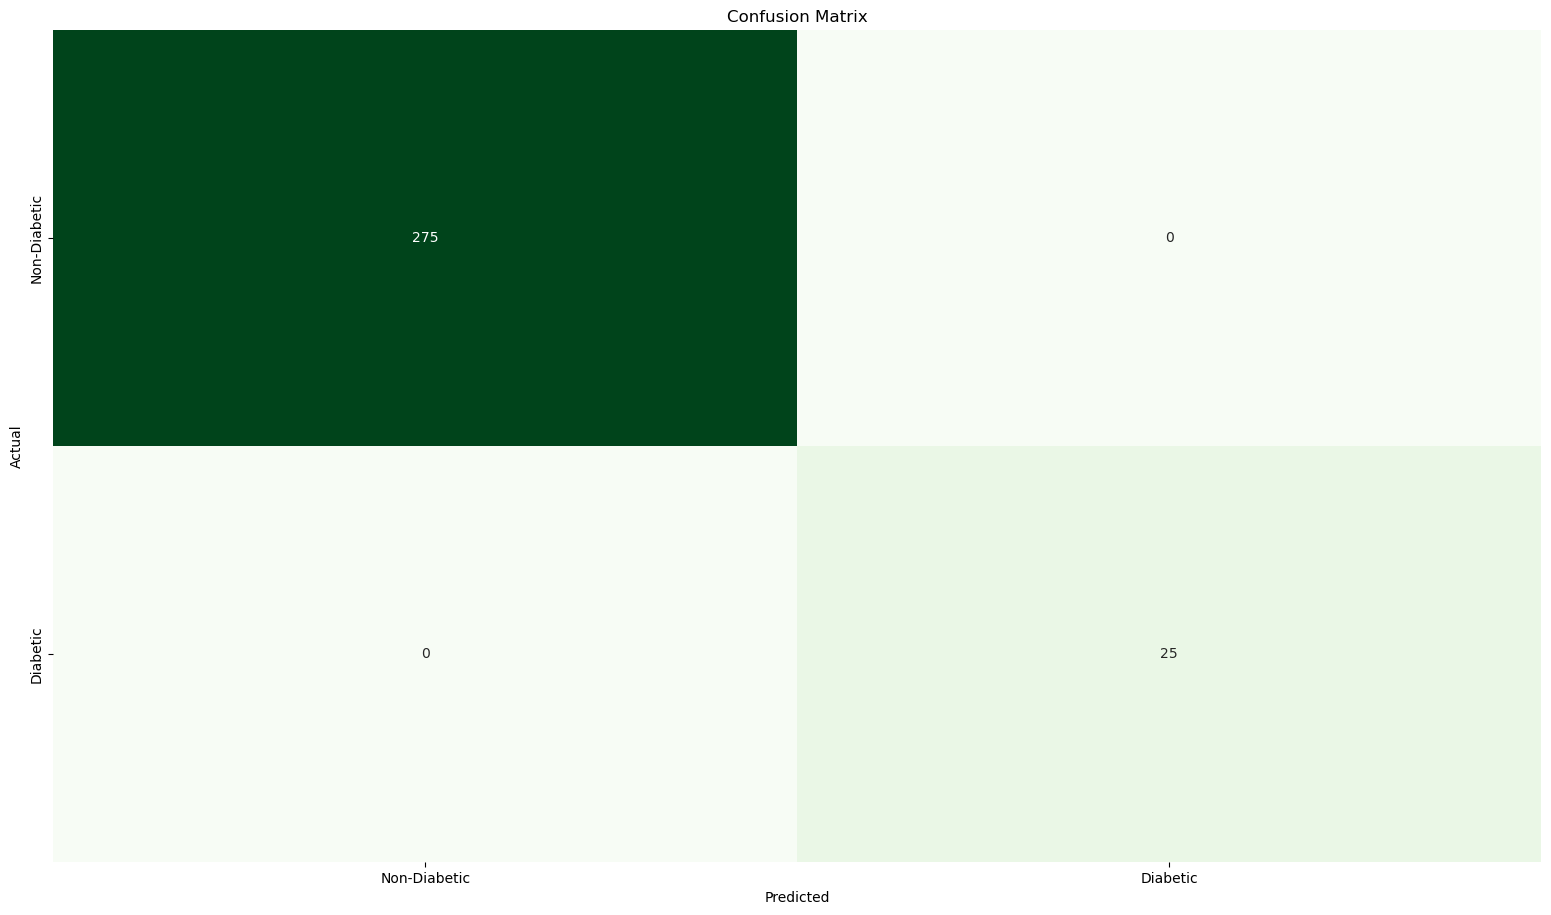

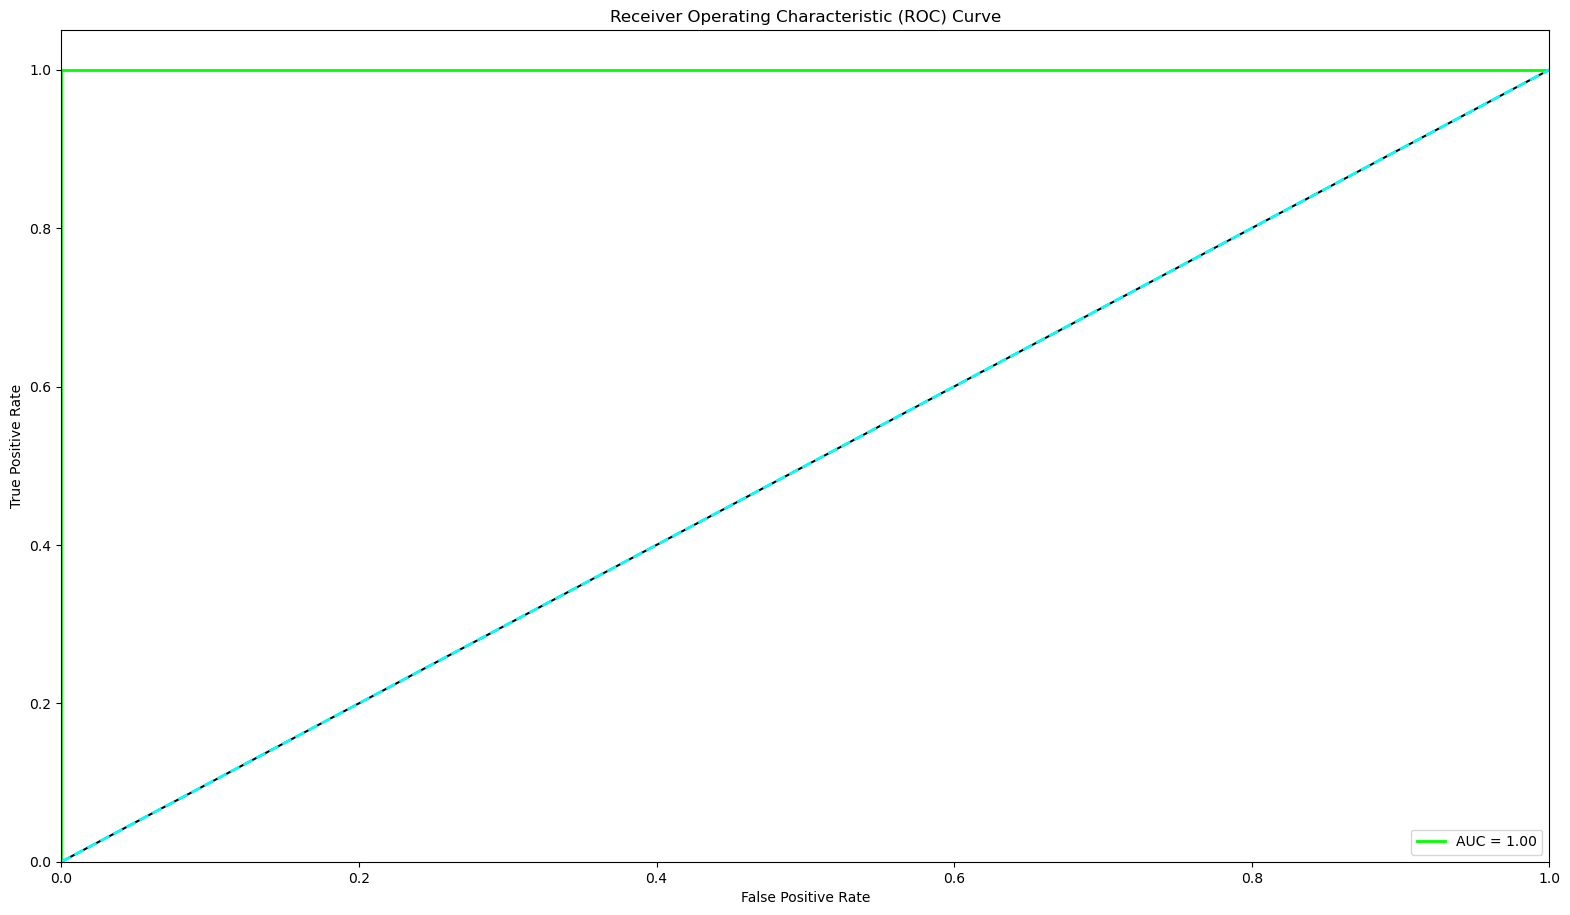

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assuming X and y are already defined as features and target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model within a pipeline to include scaling
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='lime', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black')
plt.plot([0, 1], [0, 1], color='cyan', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## KNN Model

Training Accuracy: 0.91
Testing Accuracy: 0.90
Confusion Matrix:
[[270   5]
 [ 24   1]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

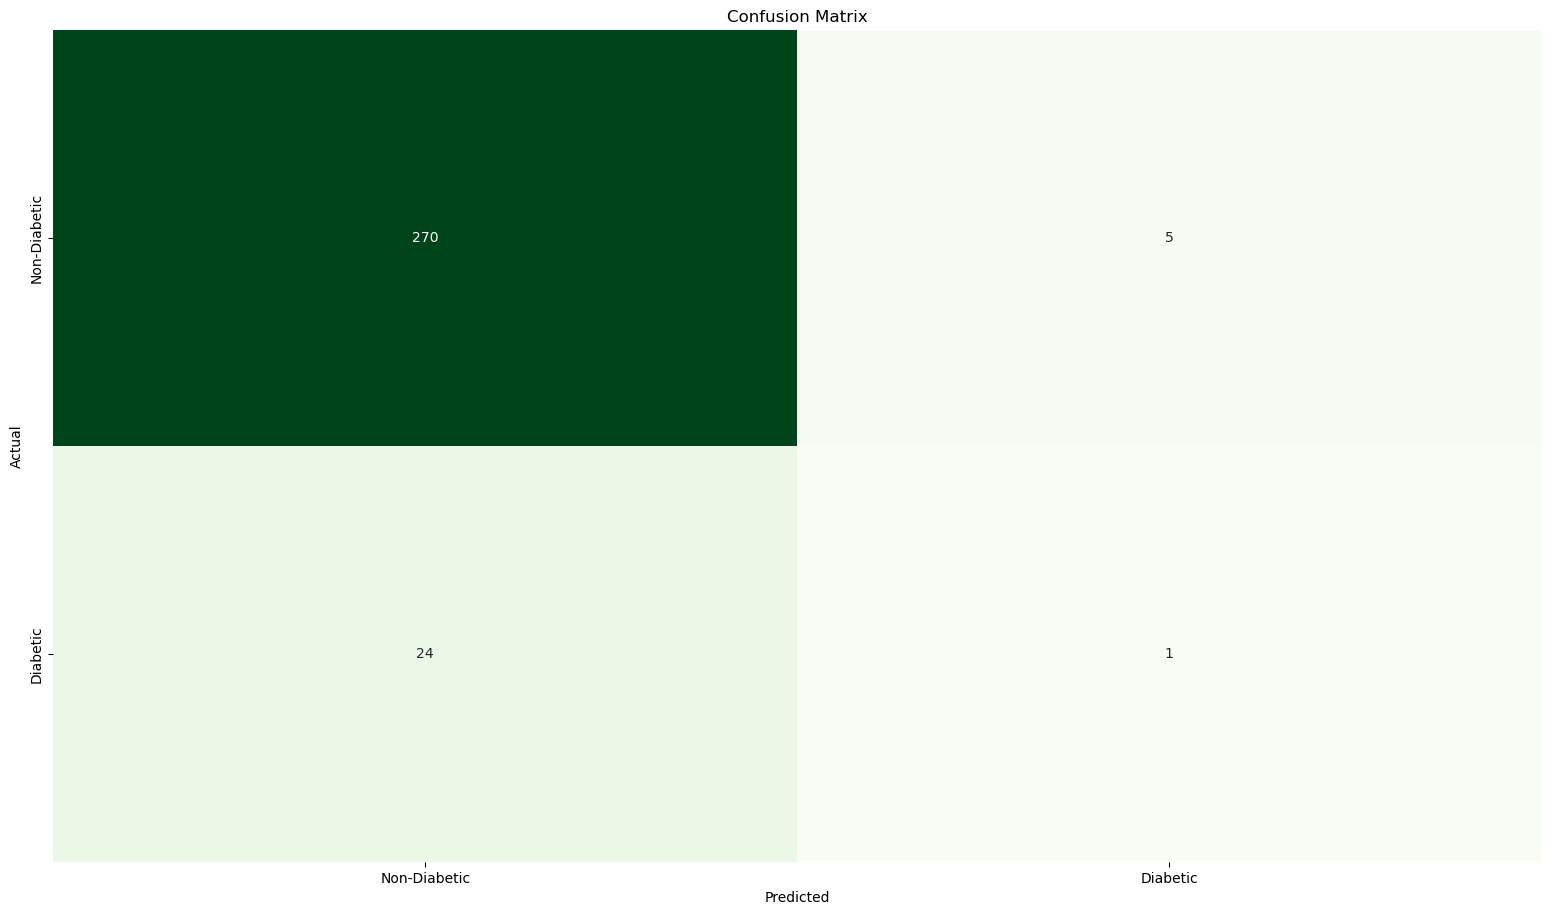

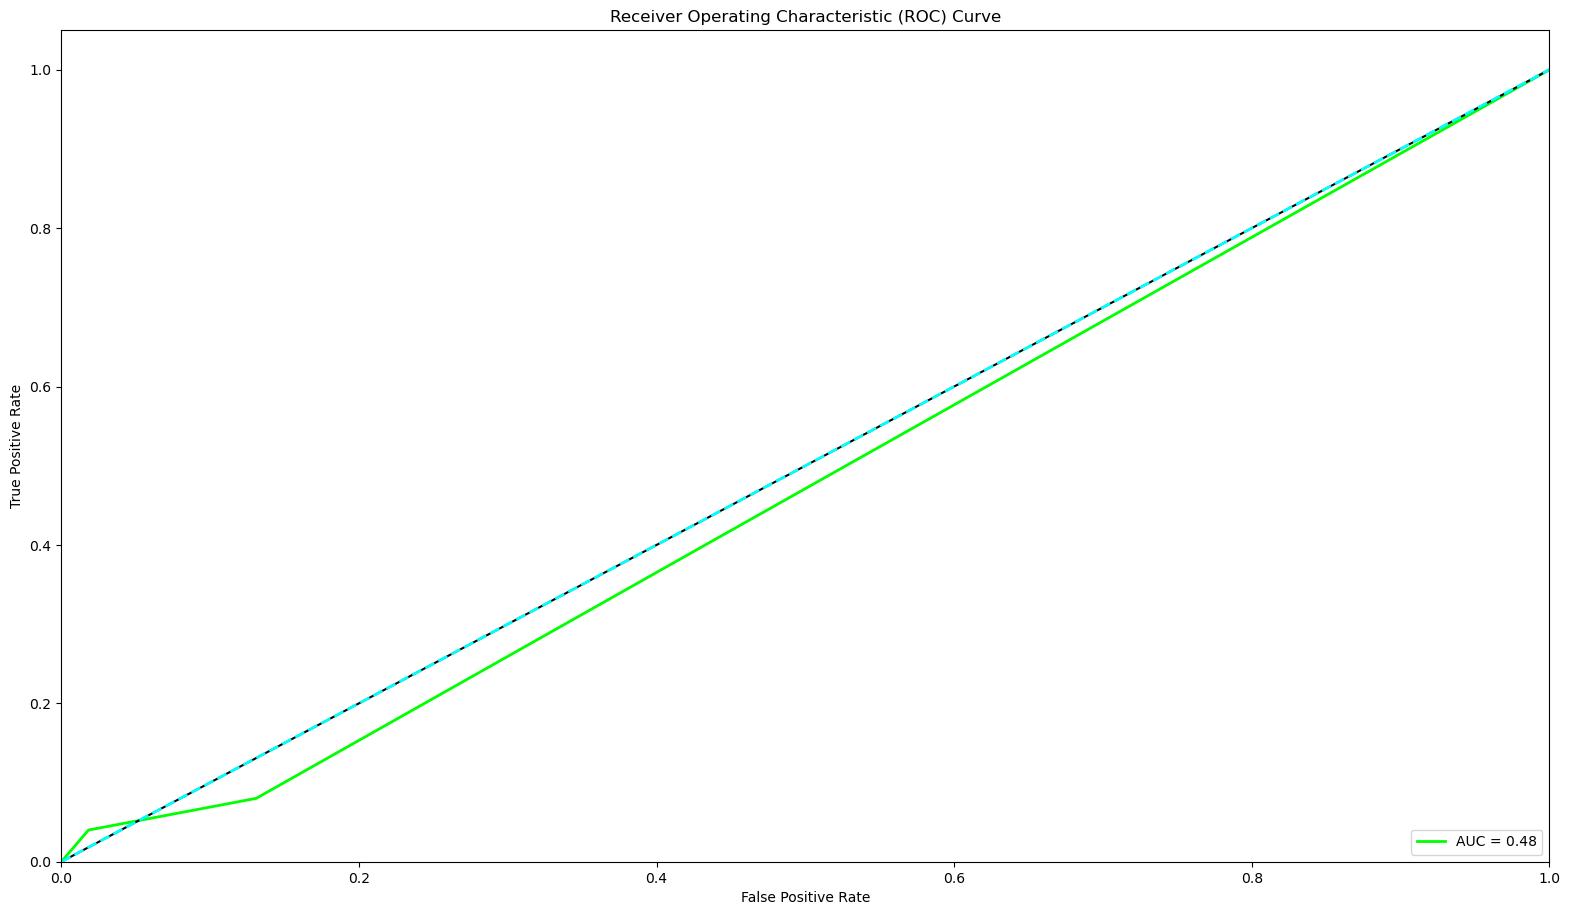

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='lime', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black')
plt.plot([0, 1], [0, 1], color='cyan', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest Model

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[275   0]
 [  0  25]]


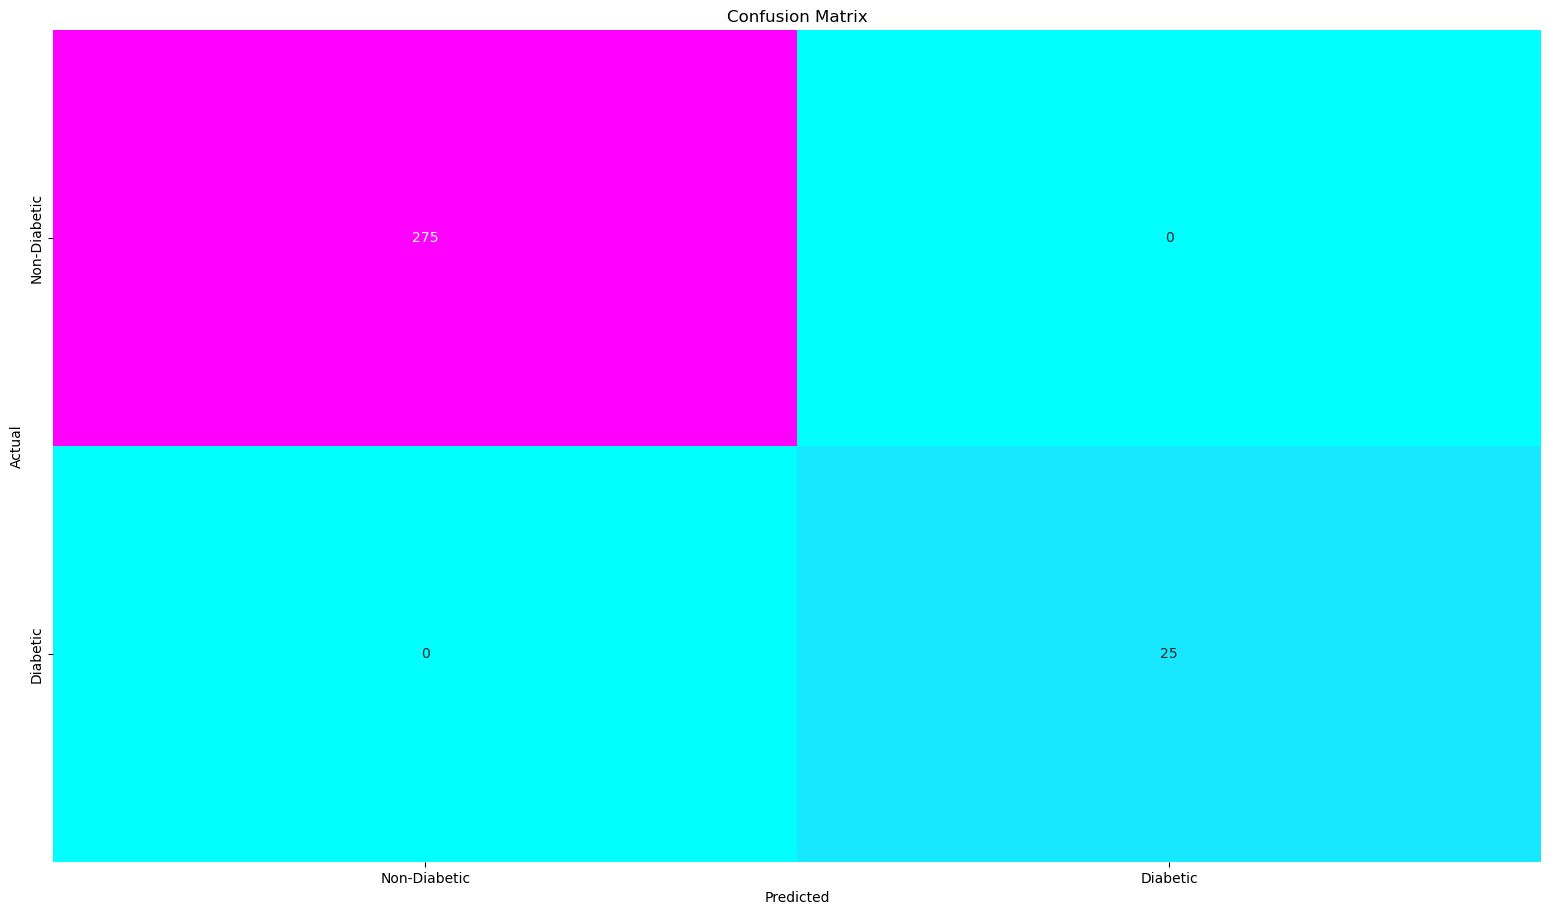

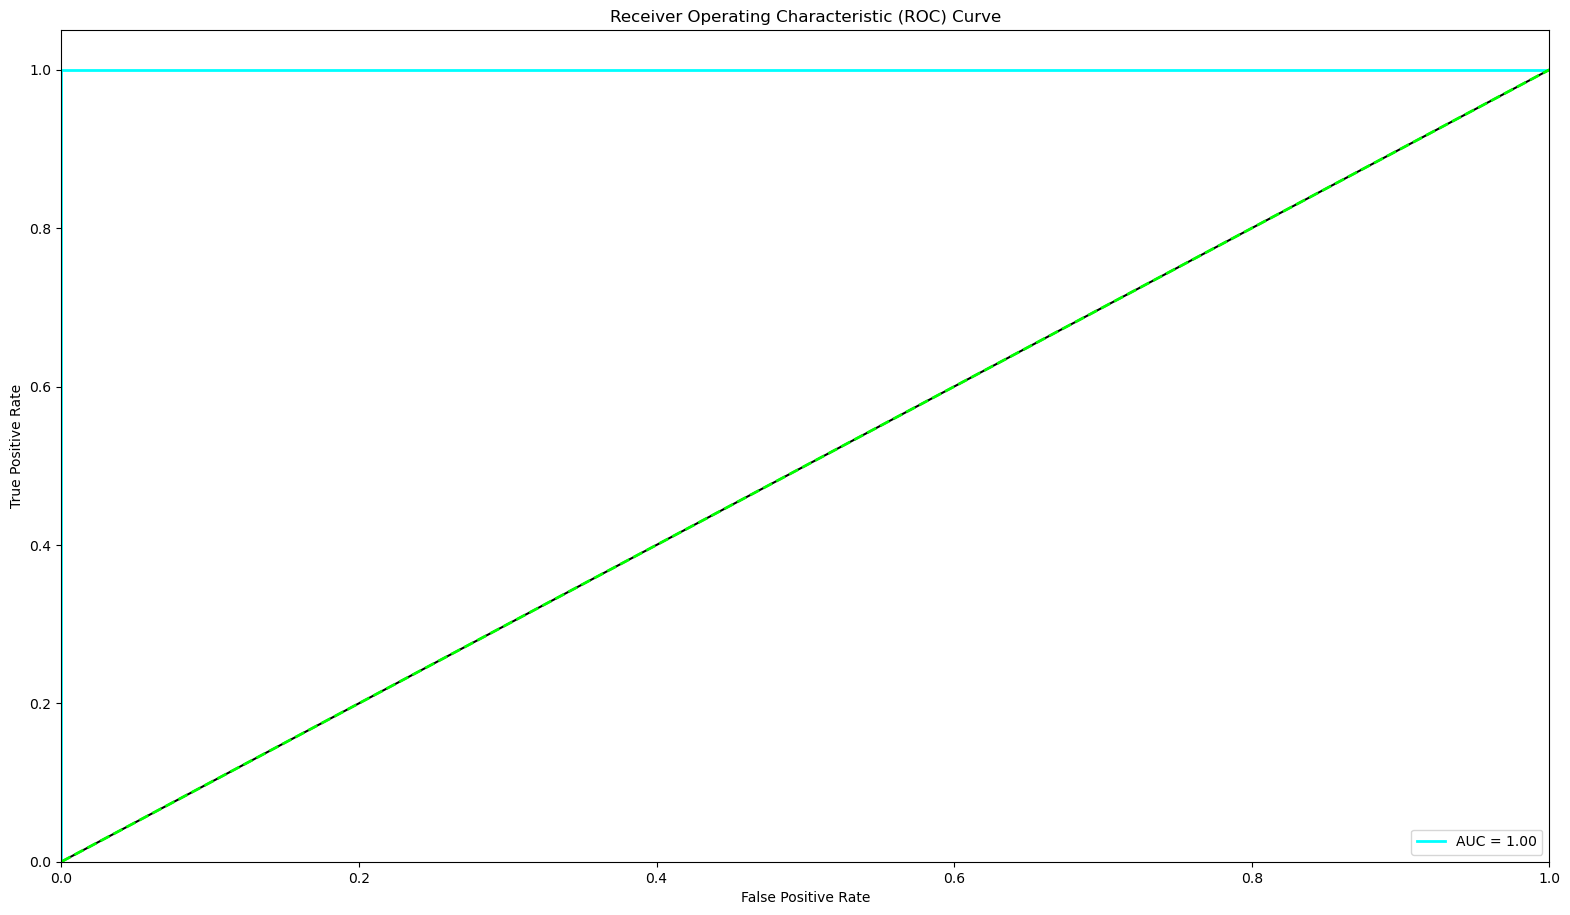

Model saved at ML_MODEL/random_forest_model.pkl


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(19.2, 10.8))
sns.heatmap(cm, annot=True, fmt='d', cmap='cool', cbar=False, xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(19.2, 10.8))
plt.plot(fpr, tpr, color='cyan', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='black')
plt.plot([0, 1], [0, 1], color='lime', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')



 #### The Logistic Regression Model and Random Forest Model gave higher accuracy so we use any one of these model
 